<a href="https://colab.research.google.com/github/Alisoltan82/Time-Series-recursive-forecasting/blob/main/Recursive_forcasting_train_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session Objective


> objective of this session is to develop a machine learning model(single Model) with a high
accurecy from the available features in the dataset.


> to extract and engineer features for best possible accuracy.









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv' , parse_dates= ['date'])
test = pd.read_csv('/content/test.csv', parse_dates= ['date'])


***checking the target variable distribution***

<Axes: ylabel='Frequency'>

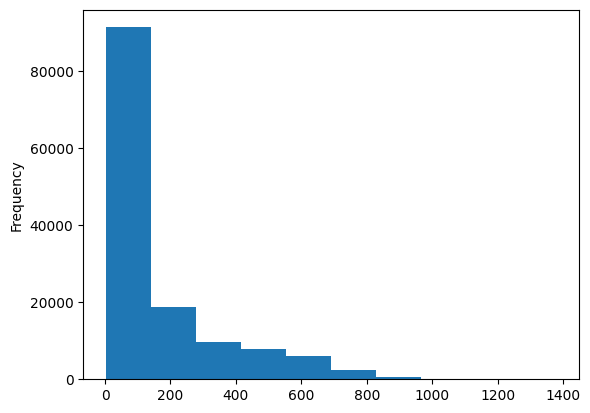

In [ ]:
df['num_sold'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

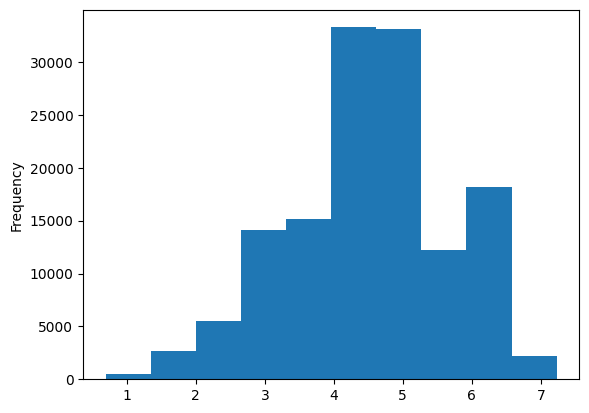

In [ ]:
np.log(df['num_sold']).plot(kind = 'hist') #log distribution is less skewed

In [ ]:
df

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [ ]:
static_cov =['country' , 'store' ,'product']

In [ ]:
df.country.unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

country
Argentina    Axes(0.125,0.11;0.775x0.77)
Canada       Axes(0.125,0.11;0.775x0.77)
Estonia      Axes(0.125,0.11;0.775x0.77)
Japan        Axes(0.125,0.11;0.775x0.77)
Spain        Axes(0.125,0.11;0.775x0.77)
Name: num_sold, dtype: object

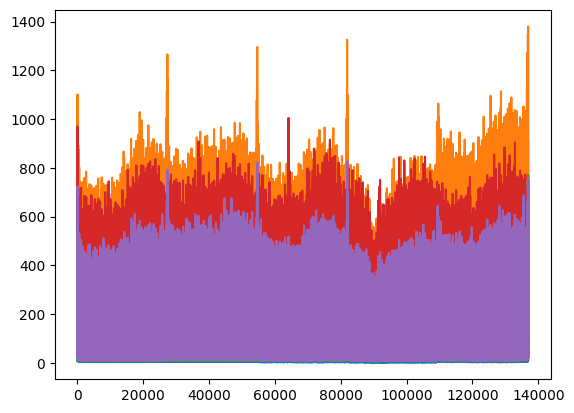

In [ ]:
df.groupby(['country'])['num_sold'].plot()

In [ ]:
df_new = df.pivot_table(values = 'num_sold',
                        columns = ['country' , 'store' , 'product']
                        )
df_new.stack(['country', 'store'])

product                          Using LLMs to Improve Your Coding  \
         country   store                                             
num_sold Argentina Kagglazon                            170.886090   
                   Kaggle Learn                          29.885542   
                   Kaggle Store                          46.193866   
         Canada    Kagglazon                            710.291347   
                   Kaggle Learn                         125.486857   
                   Kaggle Store                         193.214129   
         Estonia   Kagglazon                            361.949069   
                   Kaggle Learn                          63.815991   
                   Kaggle Store                          98.389923   
         Japan     Kagglazon                            608.437568   
                   Kaggle Learn                         107.387733   
                   Kaggle Store                         165.180723   
         Spain     Kagglazon                            443.661555   
                   Kaggle Learn                          78.318182   
                   Kaggle Store                         120.713582   

product                          Using LLMs to Train More LLMs  \
         country   store                                         
num_sold Argentina Kagglazon                        168.339540   
                   Kaggle Learn                      29.507667   
                   Kaggle Store                      45.702629   
         Canada    Kagglazon                        700.006024   
                   Kaggle Learn                     123.720153   
                   Kaggle Store                     190.423877   
         Estonia   Kagglazon                        357.942497   
                   Kaggle Learn                      62.987952   
                   Kaggle Store                      97.257941   
         Japan     Kagglazon                        602.786966   
                   Kaggle Learn                     106.258488   
                   Kaggle Store                     163.348850   
         Spain     Kagglazon                        437.995619   
                   Kaggle Learn                      77.298467   
                   Kaggle Store                     118.994524   

product                          Using LLMs to Win Friends and Influence People  \
         country   store                                                          
num_sold Argentina Kagglazon                                          26.231654   
                   Kaggle Learn                                        4.237678   
                   Kaggle Store                                        6.774370   
         Canada    Kagglazon                                         109.739321   
                   Kaggle Learn                                       19.102410   
                   Kaggle Store                                       29.658269   
         Estonia   Kagglazon                                          56.094743   
                   Kaggle Learn                                        9.500000   
                   Kaggle Store                                       14.870208   
         Japan     Kagglazon                                          94.236583   
                   Kaggle Learn                                       16.273275   
                   Kaggle Store                                       25.348850   
         Spain     Kagglazon                                          68.595290   
                   Kaggle Learn                                       11.745345   
                   Kaggle Store                                       18.306134   

product                          Using LLMs to Win More Kaggle Competitions  \
         country   store                                                      
num_sold Argentina Kagglazon                                     142.929354   
                   Kaggle Learn      

*combining train and test data for a preprocessing away from scaling*

In [ ]:
data_all = pd.concat([df,test] , axis = 0)
len(df) , len(test) , len(data_all)

(136950, 27375, 164325)

In [ ]:
data_all.head(2)

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0


Defining Unique values (*country , store , products)*

In [ ]:
products = data_all['product'].unique().tolist()
store = data_all['store'].unique().tolist()
country = data_all['country'].unique().tolist()
country, store , products

(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'],
 ['Kaggle Learn', 'Kaggle Store', 'Kagglazon'],
 ['Using LLMs to Improve Your Coding',
  'Using LLMs to Train More LLMs',
  'Using LLMs to Win Friends and Influence People',
  'Using LLMs to Win More Kaggle Competitions',
  'Using LLMs to Write Better'])



*   4 countries
*   3 stores types
*   5 different products per store per country






In [ ]:
categorical_columns = [
    "country",
    "store",
    "product"
]
categories = [
    ['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'],
    ['Kaggle Learn', 'Kaggle Store', 'Kagglazon'],
    ['Using LLMs to Improve Your Coding',
  'Using LLMs to Train More LLMs',
  'Using LLMs to Win Friends and Influence People',
  'Using LLMs to Win More Kaggle Competitions',
  'Using LLMs to Write Better']]

In [ ]:
data_all_new = data_all

In [ ]:
data_all_new.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

**Defining sales during corona outbreak as an exceptional incidence that would affect the rolling mean of the timeseries and consequently, the model performance**

In [ ]:
sales_corona = data_all_new.loc[(data_all_new['date'] == 2019)].groupby(['country' , 'store' , 'product'])['num_sold'].mean()

In [ ]:
sales_corona

Series([], Name: num_sold, dtype: float64)

In [ ]:
#####################################################################################
#overview of the unique patterns for different timeserieses across different horizons
#####################################################################################

In [ ]:
data_all_new['dayofweek'] = data_all_new.date.dt.dayofweek
data_all_new['month'] = data_all_new.date.dt.month

**Weekly sales per country**

array([<Axes: xlabel='dayofweek'>, <Axes: xlabel='dayofweek'>,
       <Axes: xlabel='dayofweek'>, <Axes: xlabel='dayofweek'>,
       <Axes: xlabel='dayofweek'>], dtype=object)

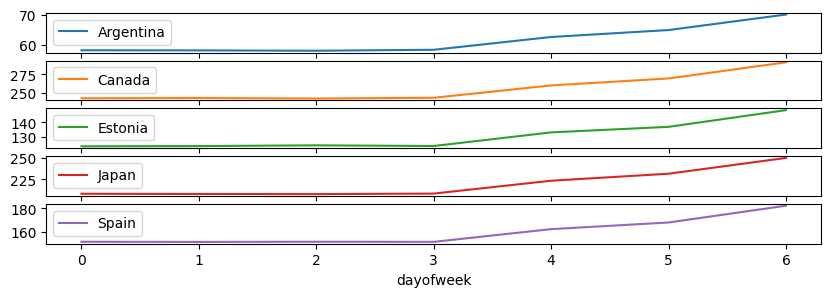

In [ ]:
data_all_new.pivot_table(
    values = 'num_sold',
    index = 'dayofweek',
    columns = 'country'
).plot(subplots = True , figsize = (10,3))

there is an obvious pattern across all countries from day 3 till 6
(midweek to weekend) should be considered as a new feature in the data

In [ ]:
data_all_new['week_effect'] = np.where(data_all_new['dayofweek']>3 , 1,0) # weekly boolean feature

**Monthly sales per country**

array([<Axes: xlabel='month'>, <Axes: xlabel='month'>,
       <Axes: xlabel='month'>, <Axes: xlabel='month'>,
       <Axes: xlabel='month'>], dtype=object)

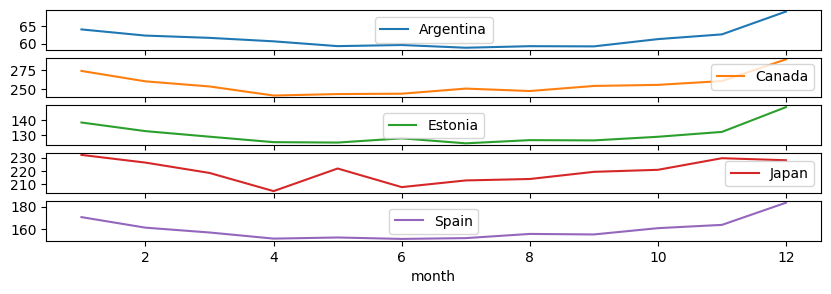

In [ ]:
data_all_new.pivot_table(
    values = 'num_sold',
    index = 'month',
    columns = 'country'
).plot(subplots = True , figsize = (10,3))

last 4 monthes of the year have an escalating trend across all countries with japan having a standalone peak in 5(may)

In [ ]:
data_all_new['month_effect'] = np.where(data_all_new['month']> 8 , 1,0) #monthly categorical feature across all countries

In [ ]:
data_all_new.loc[(data_all_new['country'] == 'Japan') & (data_all_new['month'] == 5), #Japan month 5
                 'month_effect']=5

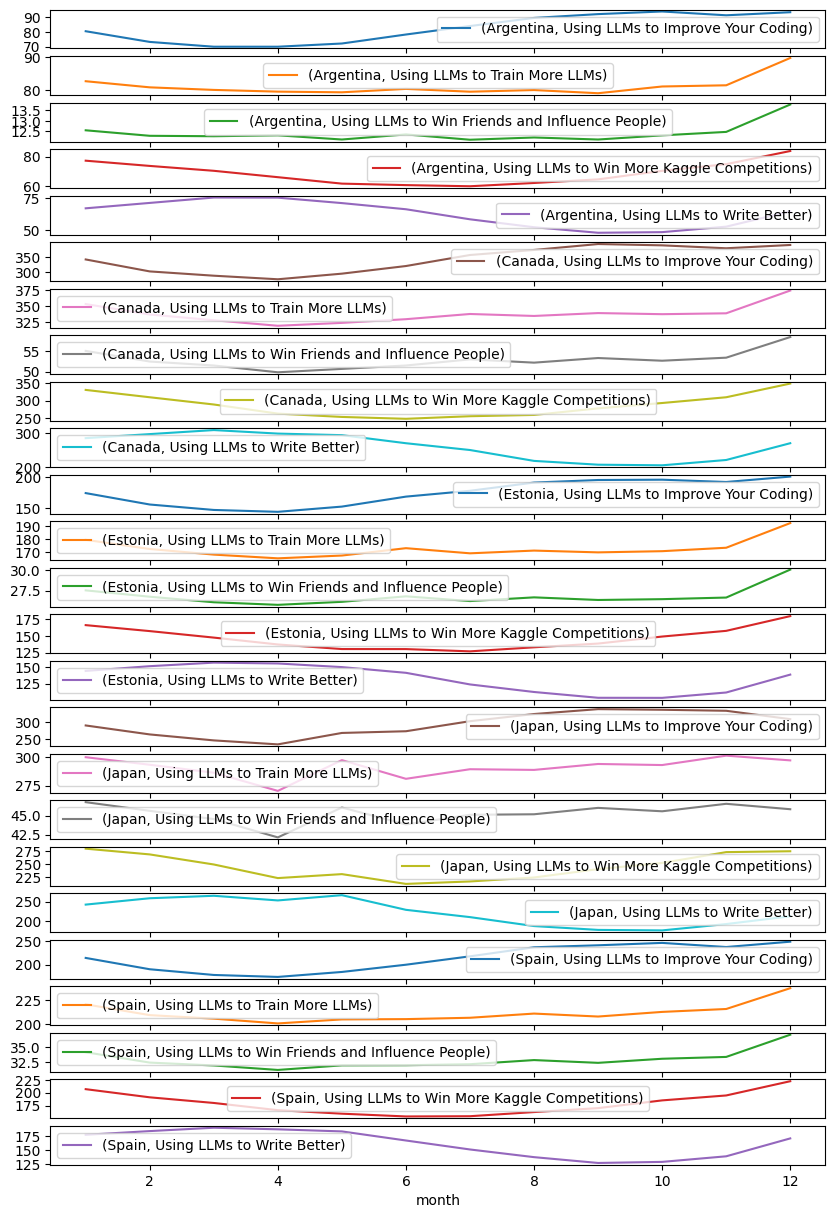

In [ ]:
data_all_new.pivot_table(
    values = 'num_sold',
    index = 'month',
    columns = ['country' ,'product']
).plot(subplots = True , figsize = (10,15))
plt.show;

array([<Axes: xlabel='month'>, <Axes: xlabel='month'>,
       <Axes: xlabel='month'>, <Axes: xlabel='month'>,
       <Axes: xlabel='month'>], dtype=object)

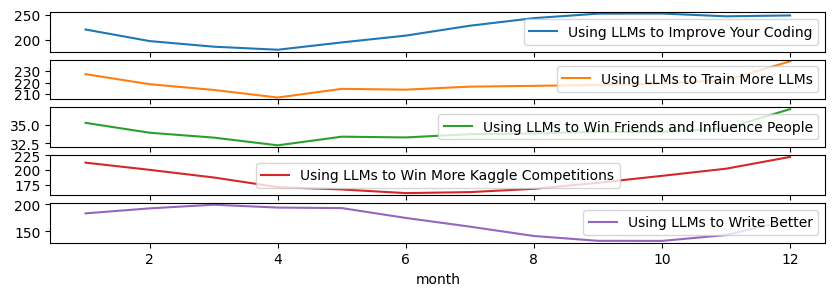

In [ ]:
data_all_new.pivot_table(
    values = 'num_sold',
    index = 'month',
    columns = 'product'
).plot(subplots = True , figsize = (10,3))

**Checking sales distribution (target variable) per country**

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

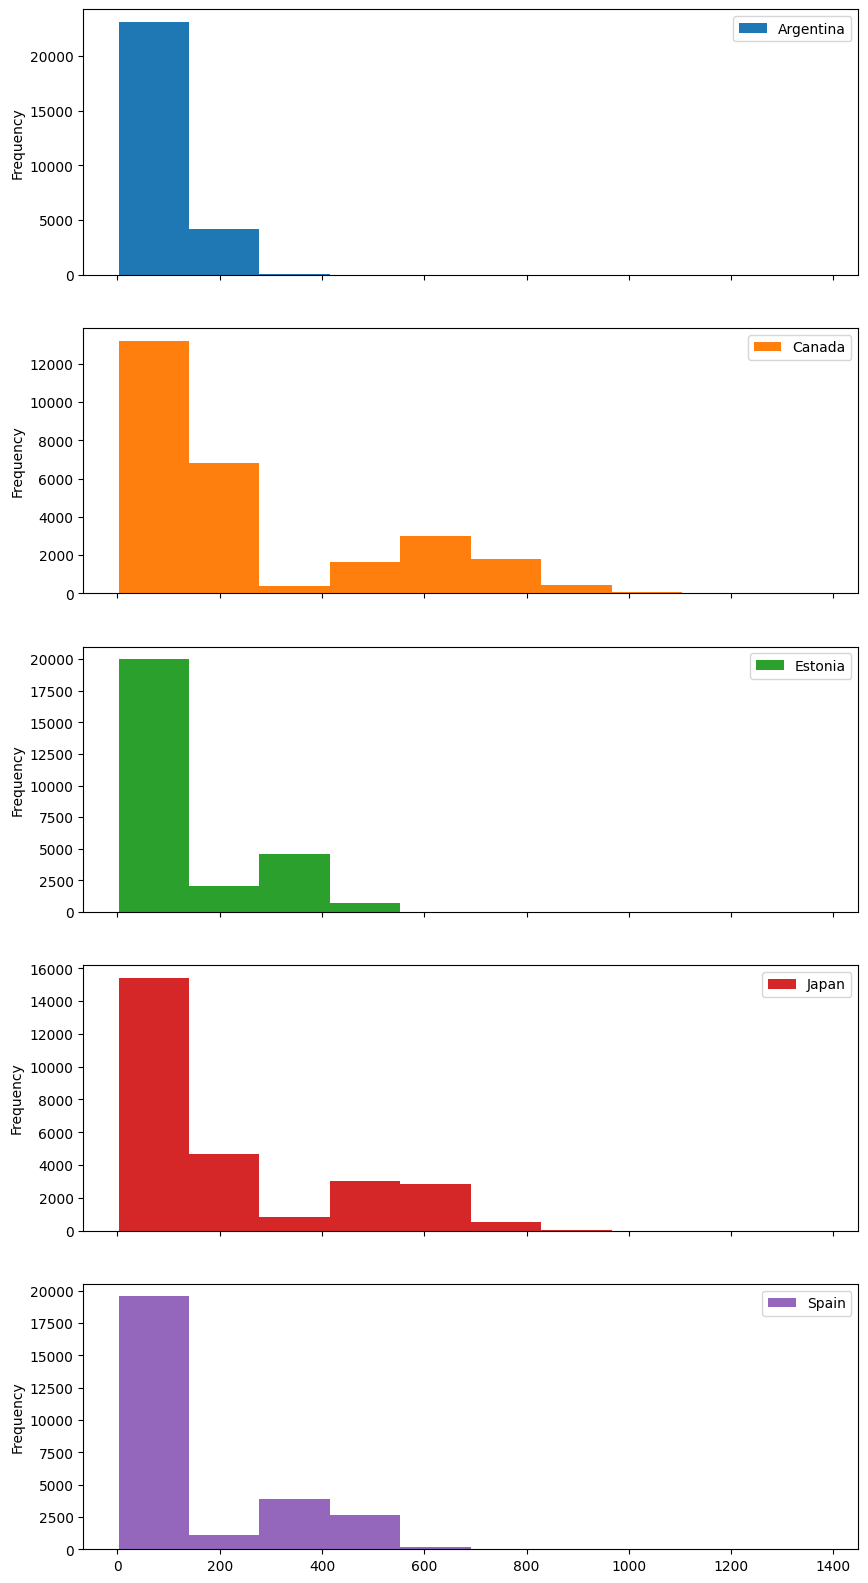

In [ ]:
data_all_new.pivot_table(
    values = 'num_sold',
    index = data_all_new.index,
    columns = 'country'
).plot( kind = 'hist' , subplots = True , figsize = (10,20))

In [ ]:
! pip install feature_engine

In [ ]:
! pip install sktime

In [ ]:
from feature_engine.transformation import BoxCoxTransformer , LogTransformer

In [ ]:
data_all_new.set_index(['date'] ,inplace = True)

**Drop corona period and replacement with previous year sales for the exact dates**

In [ ]:
corona_2019 =  data_all_new.loc[(data_all_new.index >= '2019-03-16') & (data_all_new.index<= '2019-06-21'), 'num_sold']
corona_2019

date
2019-03-16     23.0
2019-03-16     24.0
2019-03-16      4.0
2019-03-16     24.0
2019-03-16     24.0
              ...  
2019-06-21    442.0
2019-06-21    440.0
2019-06-21     64.0
2019-06-21    311.0
2019-06-21    353.0
Name: num_sold, Length: 7350, dtype: float64

In [ ]:
data_all_new.loc[(data_all_new.index >= '2020-03-16') & (data_all_new.index<= '2020-06-21'), 'num_sold']

date
2020-03-16     16.0
2020-03-16     21.0
2020-03-16      3.0
2020-03-16     17.0
2020-03-16     17.0
              ...  
2020-06-21    383.0
2020-06-21    424.0
2020-06-21     74.0
2020-06-21    288.0
2020-06-21    295.0
Name: num_sold, Length: 7350, dtype: float64

In [ ]:
corona_2019.values == data_all_new.loc[(data_all_new.index >= '2020-03-16') & (data_all_new.index<= '2020-06-21'), 'num_sold']
corona_2019

date
2019-03-16     23.0
2019-03-16     24.0
2019-03-16      4.0
2019-03-16     24.0
2019-03-16     24.0
              ...  
2019-06-21    442.0
2019-06-21    440.0
2019-06-21     64.0
2019-06-21    311.0
2019-06-21    353.0
Name: num_sold, Length: 7350, dtype: float64

<Axes: xlabel='date'>

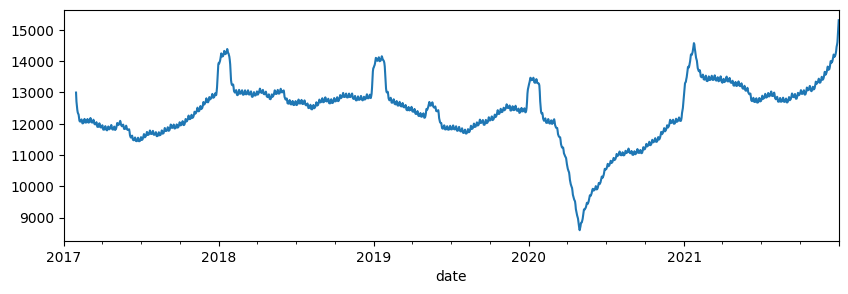

In [ ]:
total_rolling_mean = df.groupby(['date'])['num_sold'].sum().rolling(30).mean() #before dropping corona sales
total_rolling_mean.plot(figsize = (10,3))

<Axes: xlabel='date'>

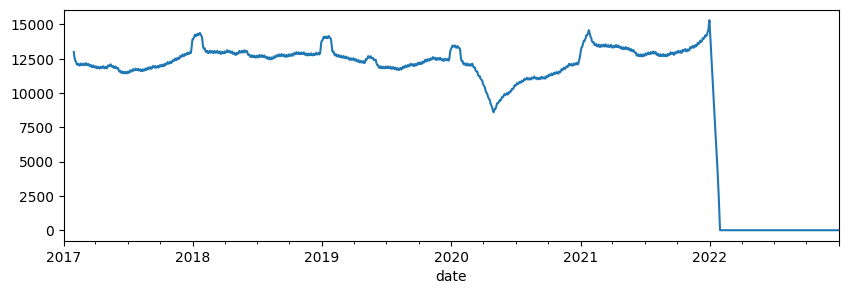

In [ ]:
total_rolling_mean = data_all_new.groupby(['date'])['num_sold'].sum().rolling(30).mean() #after dropping corona sales
total_rolling_mean.plot(figsize = (10,3))

In [ ]:
####################
#Data Preprocessing
####################

In [ ]:
from sktime.transformations.series.boxcox import BoxCoxTransformer , LogTransformer

In [ ]:
y_transformer = LogTransformer()
data_all_new['box_num_sold'] = y_transformer.fit_transform(data_all_new['num_sold'])


array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

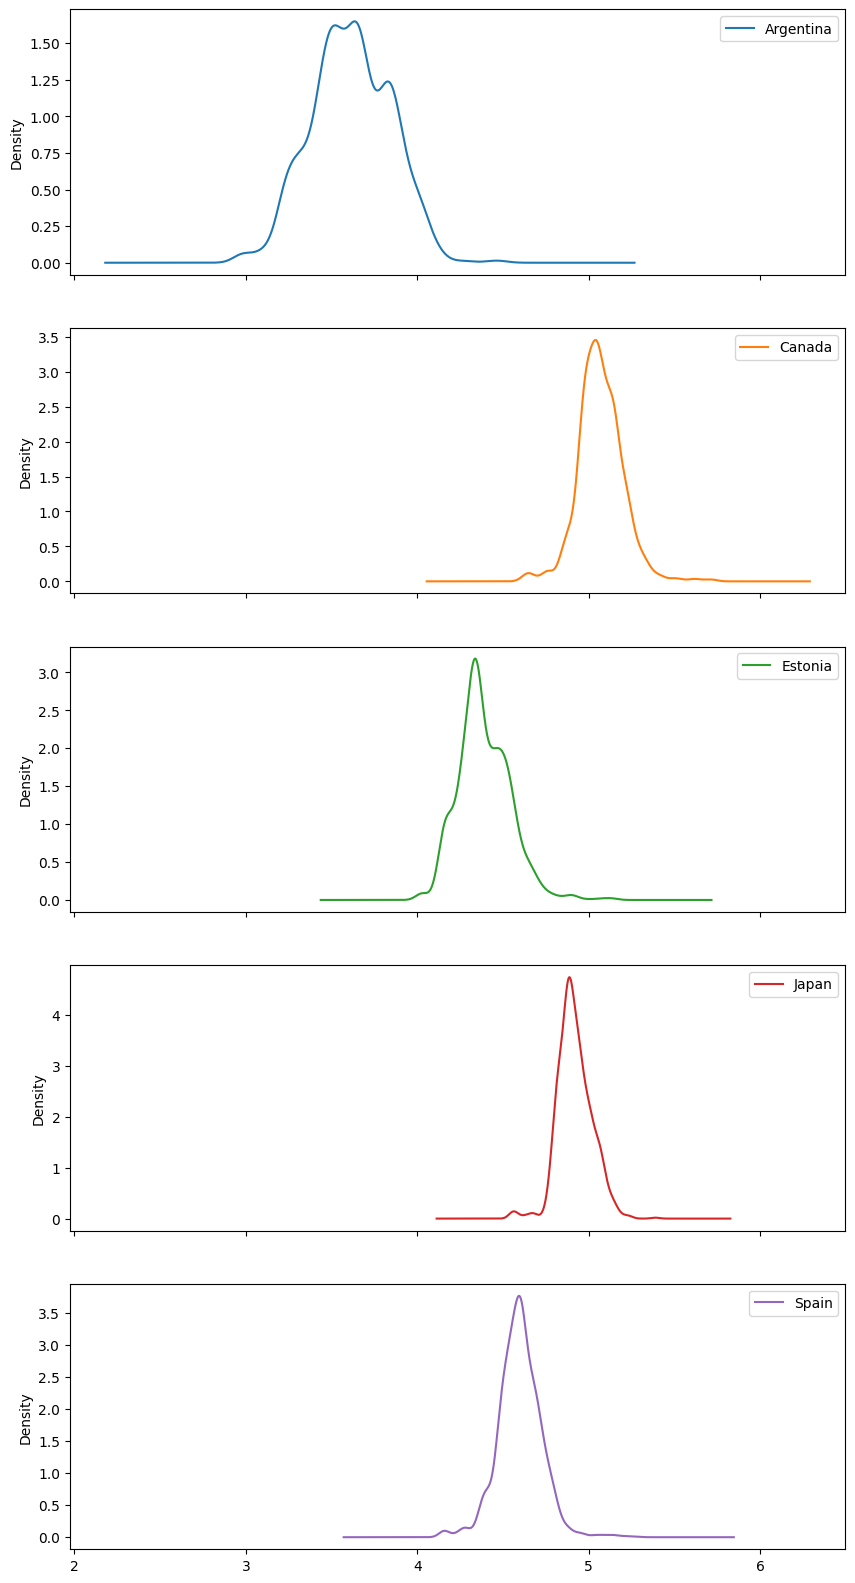

In [ ]:
data_all_new.iloc[:-len(test)].pivot_table(
    values = 'box_num_sold',
    index = data_all_new.iloc[:-len(test)].index,
    columns = 'country'
).plot( kind = 'kde', subplots = True , figsize = (10,20))

In [ ]:
data_all_new.drop(columns = ['num_sold'] , axis = 1 , inplace = True)

In [ ]:
data_all_new.isna().sum()

id                  0
country             0
store               0
product             0
dayofweek           0
month               0
week_effect         0
month_effect        0
box_num_sold    27375
dtype: int64

**time series list per country/store/product**

In [ ]:
data_all_list = []



for c in country:
    for s in store:
        for p in products:

            data = data_all_new.loc[data_all_new['country'] == c]
            dataf = data.loc[data['store'] == s]
            dataframe = dataf.loc[dataf['product'] == p]
            data_all_list.append(dataframe)

len(data_all_list)

75

*75 unique time series to work on*

In [ ]:
data_all_list[1].head(2)

,id,country,store,product,dayofweek,month,week_effect,month_effect,box_num_sold
date,,,,,,,,,
2017-01-01,1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,6,1,1,0,4.189655
2017-01-02,76,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,0,1,0,0,3.850148


In [ ]:
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
from feature_engine.imputation import DropMissingData
from feature_engine.selection import DropFeatures
from feature_engine.timeseries.forecasting import LagFeatures , WindowFeatures
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
import holidays

In [ ]:
country

['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain']

In [ ]:
Ar_holidays = holidays.AR()
Ca_holidays = holidays.CA()
Es_holidays = holidays.EE()
Ja_holidays = holidays.JP()
Sp_holidays = holidays.ES()

In [ ]:
data_all_new['holidays'] = np.where(data_all_new.index.isin([Ar_holidays,
                                                             Ca_holidays,
                                                             Es_holidays,
                                                             Ja_holidays,
                                                             Sp_holidays]),1,0)

In [ ]:
##########################
#feature engineering pipe
##########################

In [ ]:
dtf = DatetimeFeatures(
    variables = 'index',
    features_to_extract=[
        'week',
        'day_of_month',
        'weekend',
        'leap_year'
    ]
)

lagf = LagFeatures(
    variables = 'box_num_sold',
    freq= ['1D' , '2D' , '3D' ],
    missing_values= 'ignore'
)

winf = WindowFeatures(
    variables = 'box_num_sold',
    window = [3],
    functions= ['mean' , 'std'],
    min_periods= 1,
    freq = '1D',
    missing_values = 'ignore'
)

cyclicf = CyclicalFeatures(
    variables = ['month', 'week'],
    drop_original=False
)

imputer = DropMissingData()

dropper = DropFeatures(features_to_drop = ['box_num_sold', 'id' , 'country' , 'store' , 'product'])

**Train_test_split**

In [ ]:
Train_list = []
Test_list = []
for i in range(0,len(data_all_list)):

  Train = data_all_list[i].iloc[:-365]
  Train_list.append(Train)
  Test = data_all_list[i].iloc[-365:]
  Test_list.append(Test)

Train_list[i].shape , Test_list[i].shape

((1826, 9), (365, 9))

In [ ]:
print(f'start at :{Train_list[i].index.min()} , end at: {Train_list[i].index.max()}')

start at :2017-01-01 00:00:00 , end at: 2021-12-31 00:00:00


In [ ]:
print(f'start at :{Test_list[i].index.min()} , end at: {Test_list[i].index.max()}')

start at :2022-01-01 00:00:00 , end at: 2022-12-31 00:00:00


In [ ]:
#test_1 to predict 2021-01-01

x_train = Train_list[0][Train_list[0].index < '2021-01-01']
x_test = Train_list[0][Train_list[0].index >= pd.Timestamp('2021-01-01') - pd.offsets.Day(3)]

In [ ]:
y_train = Train_list[0][Train_list[0].index < '2021-01-01']['box_num_sold']
y_test = Train_list[0][Train_list[0].index >= pd.Timestamp('2021-01-01') - pd.offsets.Day(3)]['box_num_sold']

In [ ]:

pipe = Pipeline(steps = [
    ('date_features' , dtf),
    ('lag_features' , lagf),
    ('window_features' , winf),
    ('periodic_features' , cyclicf),
    ('dropna' , imputer),
    ('drop_cols' , dropper)
])

In [ ]:
x_train_t = pipe.fit_transform(x_train)
x_train_t.shape , x_train.shape

((1458, 17), (1461, 9))

In [ ]:
x_train_t.shape , y_train.shape

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


((1458, 17), (1461,))

In [ ]:
y_train_t = y_train.loc[x_train_t.index] ##########################
x_train_t.shape , y_train_t.shape

((1458, 17), (1458,))

**Model**

In [ ]:
from sklearn.linear_model import Lasso , Ridge

model = Ridge()

**Model_fit**

In [ ]:
model.fit(x_train_t , y_train_t)

Ridge()

**prediction on training data**

In [ ]:
preds = model.predict(x_train_t)

preds

array([3.77842387, 3.74003045, 3.73912394, ..., 3.34993163, 3.47376217,
       3.55244795])

In [ ]:
preds = pd.DataFrame(preds ,
                     index = x_train_t.index)
preds

,0
date,
2017-01-04,3.778424
2017-01-05,3.740030
2017-01-06,3.739124
2017-01-07,3.740377
2017-01-08,3.757974
...,...
2020-12-27,3.353622
2020-12-28,3.258647
2020-12-29,3.349932


Text(0, 0.5, 'preds')

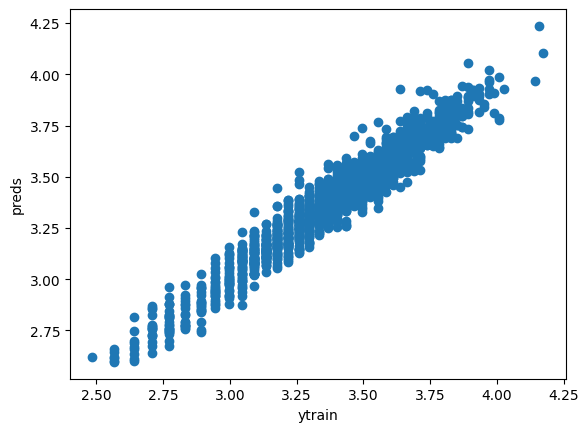

In [ ]:
plt.scatter(y_train_t , preds)
plt.xlabel('ytrain')
plt.ylabel('preds')

**Evaluation Function**

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
def score(actual , preds):
  results ={
      'mae': mean_absolute_error(actual , preds),
      'mse': mean_squared_error(actual,preds),
      'mape': mean_absolute_percentage_error(actual,preds)*100
  }
  return results

Check predictions performance

In [ ]:
score(y_train_t , preds)

{'mae': 0.05515627973879868,
 'mse': 0.004951018219406318,
 'mape': 1.6490619936628883}

In [ ]:
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='box_num_sold'>)

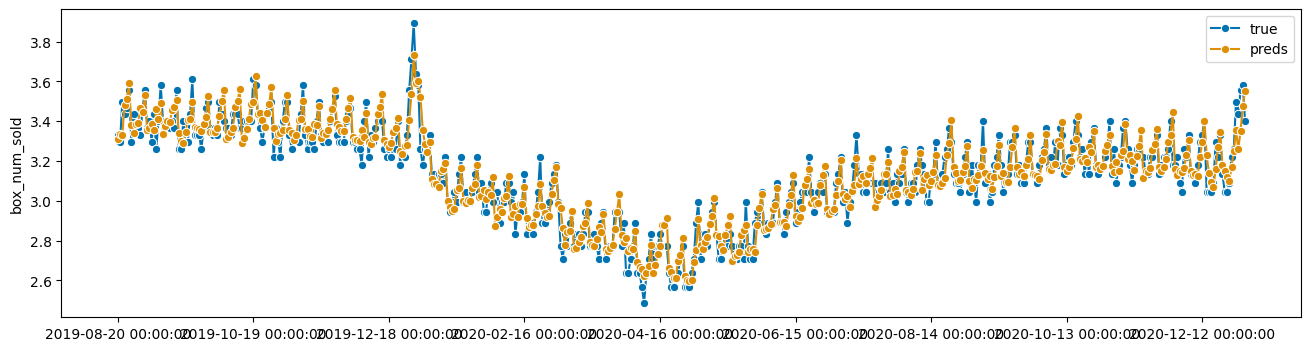

In [ ]:
plot_series(y_train_t[-500:] , preds[-500:] , labels = ['true' , 'preds'])

**predictions with test data**

In [ ]:
x_test_t = pipe.fit_transform(x_test)
x_test_t.head(1)

,dayofweek,month,week_effect,month_effect,week,day_of_month,weekend,leap_year,box_num_sold_lag_1D,box_num_sold_lag_2D,box_num_sold_lag_3D,box_num_sold_window_3_mean,box_num_sold_window_3_std,month_sin,month_cos,week_sin,week_cos
date,,,,,,,,,,,,,,,,,
2021-01-01,4,1,1,0,53,1,0,0,3.401197,3.583519,3.555348,3.513355,0.098147,0.5,0.866025,-2.449294e-16,1.0


In [ ]:
preds_2 = model.predict(x_test_t)

In [ ]:
y_test_t = y_test.loc[x_test_t.index]
y_test_t.shape , preds_2.shape

((365,), (365,))

In [ ]:
score(y_test_t , preds_2)

{'mae': 0.052224244407588466,
 'mse': 0.0044100516873850455,
 'mape': 1.5601090736485086}

In [ ]:
preds_2 = pd.DataFrame(preds_2,
                       index = y_test_t.index)

In [ ]:
preds_2

,0
date,
2021-01-01,3.579859
2021-01-02,3.632852
2021-01-03,3.664634
2021-01-04,3.401223
2021-01-05,3.343618
...,...
2021-12-27,3.477553
2021-12-28,3.591836
2021-12-29,3.643847


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='box_num_sold'>)

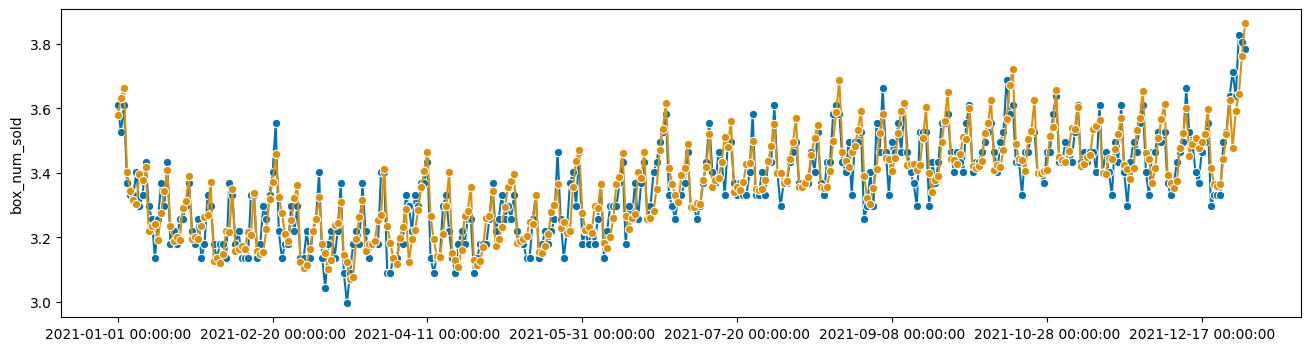

In [ ]:
plot_series(y_test_t , preds_2)

**Multi_step recurive forecasting for a horizon of 30 days**

In [ ]:
#multistpes

forecast_point = pd.Timestamp('2021-01-01')
forecast_end = forecast_point + pd.offsets.Day(30)

forecast_point , forecast_end

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-01-31 00:00:00'))

In [ ]:
#Future_dataframe

index = pd.date_range(
    start = forecast_point,
    end = forecast_end,
    freq = '1D'
)

In [ ]:
horizon = pd.DataFrame(columns = ['num_sold'] , index = index)

In [ ]:
horizon

,num_sold
2021-01-01,NaN
2021-01-02,NaN
2021-01-03,NaN
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,NaN
2021-01-07,NaN
2021-01-08,NaN
2021-01-09,NaN
2021-01-10,NaN


In [ ]:
input_start = forecast_point - pd.offsets.Day(3)
input_start

Timestamp('2020-12-29 00:00:00')

In [ ]:
forecast_point

Timestamp('2021-01-01 00:00:00')

In [ ]:
input_data = x_test[(x_test.index >= input_start) & (x_test.index <= forecast_point)]

In [ ]:
input_data

,id,country,store,product,dayofweek,month,week_effect,month_effect,box_num_sold
date,,,,,,,,,
2020-12-29,109350,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,1,12,0,1,3.555348
2020-12-30,109425,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,2,12,0,1,3.583519
2020-12-31,109500,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,3,12,0,1,3.401197
2021-01-01,109575,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,4,1,1,0,3.610918


In [ ]:
#pipe.transform(input_data)

Multi_step loop

In [ ]:
for i in range(31):

  pred = model.predict(pipe.transform(input_data))
  horizon.loc[forecast_point] = pred
  input_data.loc[forecast_point]['box_num_sold'] = pred


  forecast_point = forecast_point + pd.offsets.Day(1)
  input_start = input_start + pd.offsets.Day(1)
  input_data = x_test[(x_test.index >= input_start) & (x_test.index <= forecast_point)]
  #input_data.loc[forecast_point]['box_num_sold'] = np.nan






<ipython-input-1930-cb4fe3d76627>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data.loc[forecast_point]['box_num_sold'] = pred
<ipython-input-1930-cb4fe3d76627>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data.loc[forecast_point]['box_num_sold'] = pred
<ipython-input-1930-cb4fe3d76627>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data.loc[forecast_point]['box_num_sold'] = pred
<ipython-input-1930-cb4fe3d7

In [ ]:
horizon

,num_sold
2021-01-01,3.579859
2021-01-02,3.632852
2021-01-03,3.664634
2021-01-04,3.401223
2021-01-05,3.343618
2021-01-06,3.316159
2021-01-07,3.304461
2021-01-08,3.397432
2021-01-09,3.377202
2021-01-10,3.418779


In [ ]:
horizon2 = pd.Series(data = horizon['num_sold'],
                     index = horizon.index)
horizon2

2021-01-01    3.579859
2021-01-02    3.632852
2021-01-03    3.664634
2021-01-04    3.401223
2021-01-05    3.343618
2021-01-06    3.316159
2021-01-07    3.304461
2021-01-08    3.397432
2021-01-09    3.377202
2021-01-10    3.418779
2021-01-11    3.219282
2021-01-12    3.236721
2021-01-13    3.241762
2021-01-14    3.193434
2021-01-15    3.274676
2021-01-16     3.34251
2021-01-17     3.40831
2021-01-18     3.23397
2021-01-19    3.188885
2021-01-20    3.201836
2021-01-21    3.191417
2021-01-22    3.291705
2021-01-23    3.314084
2021-01-24    3.388892
2021-01-25    3.195775
2021-01-26    3.200013
2021-01-27    3.195038
2021-01-28    3.234611
2021-01-29     3.26416
2021-01-30    3.269625
2021-01-31    3.370399
Freq: D, Name: num_sold, dtype: object

In [ ]:
y_test[3:34]

date
2021-01-01    3.610918
2021-01-02    3.526361
2021-01-03    3.610918
2021-01-04    3.367296
2021-01-05    3.332205
2021-01-06    3.332205
2021-01-07    3.401197
2021-01-08    3.295837
2021-01-09    3.332205
2021-01-10    3.433987
2021-01-11    3.295837
2021-01-12    3.258097
2021-01-13    3.135494
2021-01-14    3.258097
2021-01-15    3.367296
2021-01-16    3.295837
2021-01-17    3.433987
2021-01-18    3.178054
2021-01-19    3.218876
2021-01-20    3.178054
2021-01-21    3.258097
2021-01-22    3.258097
2021-01-23    3.295837
2021-01-24    3.367296
2021-01-25    3.218876
2021-01-26    3.178054
2021-01-27    3.258097
2021-01-28    3.135494
2021-01-29    3.178054
2021-01-30    3.332205
2021-01-31    3.295837
Name: box_num_sold, dtype: float64

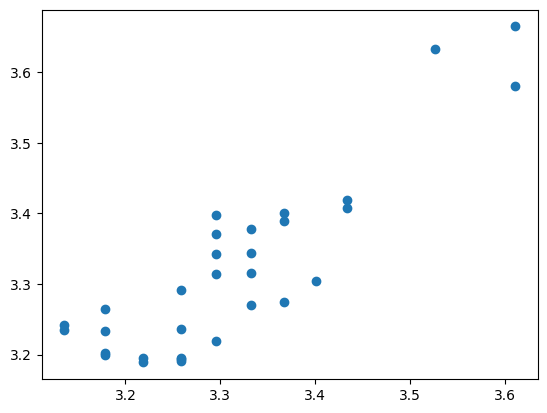

In [ ]:
plt.scatter(y_test[3:34] , horizon2)

In [ ]:
score(y_test[3:34] , horizon2)

{'mae': 0.0524298182468949,
 'mse': 0.0036950180510048826,
 'mape': 1.5888336768891613}